In [2]:
# firstly we import all the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# next we import the dataset and have alook at a few rows

df_heart = pd.read_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//Poster 2//heart.csv")

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes)

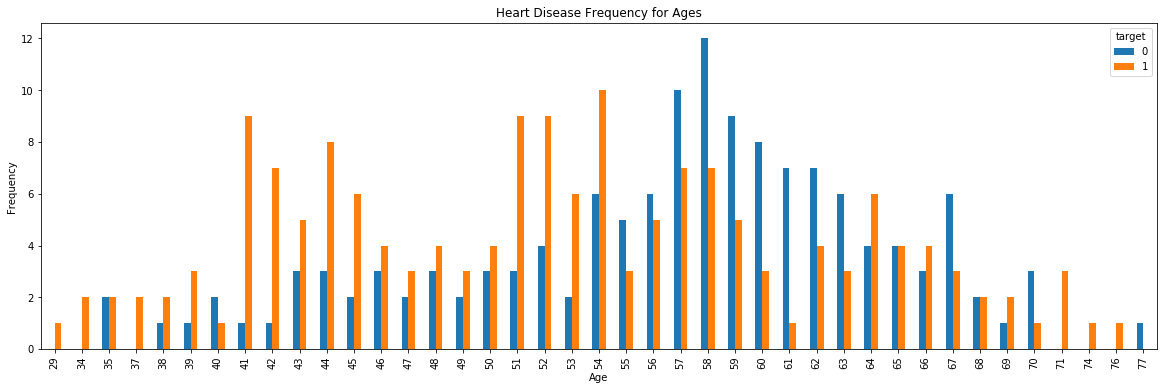

In [5]:
pd.crosstab(df_heart.age,df_heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()

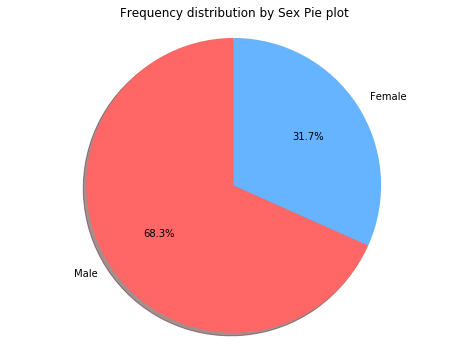

In [6]:
male =len(df_heart[df_heart['sex'] == 1])
female = len(df_heart[df_heart['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['#ff6666', '#66b3ff']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Frequency distribution by Sex Pie plot")
 
plt.axis('equal')
plt.show()

In [7]:
pd.crosstab(df_heart.sex,df_heart.target).plot(kind="bar",figsize=(15,6),color=['#ff6666','#66b3ff' ])
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No heart disease", "Have heart disease"])
plt.ylabel("Count")plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()
plt.show()

SyntaxError: invalid syntax (<ipython-input-7-b1b56e9c4430>, line 6)

<Figure size 576x432 with 0 Axes>

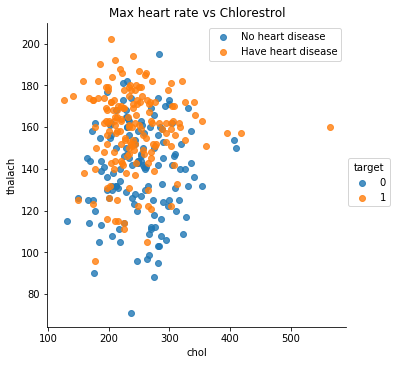

In [8]:
plt.figure(figsize=(8,6))
sns.lmplot(x='chol',y='thalach',data=df_heart, hue='target', fit_reg=False)
plt.title('Max heart rate vs Chlorestrol')
plt.legend(["No heart disease", "Have heart disease"])
plt.show()

# Let's do some pre-processing before classification

In [9]:
# let's do some pre-processing before we actually make classification models
y = df_heart.target.values
X = df_heart.drop(['target'], axis = 1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
# let's perform some feature scaling here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# First Technique: Logistic Regression

In [11]:
# fitting the logistic regression to the training set
from sklearn.linear_model import LogisticRegression
logistic_classfier = LogisticRegression(random_state=0)
logistic_classfier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_pred_logistic = logistic_classfier.predict(X_test)

# also predict the accuracy of the model using method accuracy_score
from sklearn.metrics import accuracy_score
print("The Accuracy of logistic regression model:", accuracy_score(y_test, y_pred_logistic))

# also get the precision recall and the f-1 score
from sklearn.metrics import recall_score, precision_score, classification_report, roc_auc_score, roc_curve
print(classification_report(y_test, y_pred_logistic))

The Accuracy of logistic regression model: 0.8360655737704918
             precision    recall  f1-score   support

          0       0.84      0.78      0.81        27
          1       0.83      0.88      0.86        34

avg / total       0.84      0.84      0.84        61



In [13]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_logistic)
print("This is the confusion matrix for our Logistic Regression model")
#
cm_lr

This is the confusion matrix for our Logistic Regression model


array([[21,  6],
       [ 4, 30]], dtype=int64)

# k-NN k-Nearest Neighbors

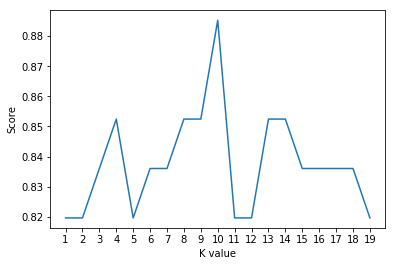

In [14]:
# first let's import the necessary library
from sklearn.neighbors import KNeighborsClassifier

# let's first find out the best value of k
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i, metric='minkowski', p = 2)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("The Accuracy of the k-NN model:", accuracy_score(y_test, prediction))

# also get the precision recall and the f-1 score
from sklearn.metrics import recall_score, precision_score, classification_report, roc_auc_score, roc_curve
print(classification_report(y_test, prediction))

The Accuracy of the k-NN model: 0.8852459016393442
             precision    recall  f1-score   support

          0       0.86      0.89      0.87        27
          1       0.91      0.88      0.90        34

avg / total       0.89      0.89      0.89        61



In [16]:
from sklearn.metrics import confusion_matrix
cm_kNN = confusion_matrix(y_test, prediction)
print("This is the confusion matrix for our Logistic Regression model")
#
print(cm_kNN)

This is the confusion matrix for our Logistic Regression model
[[24  3]
 [ 4 30]]


# Naive Bayes Algorithm

In [60]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

NB_predict = NB_classifier.predict(X_test)

print("The Accuracy of the Naive Bayes model:", accuracy_score(y_test, NB_predict))

# also get the precision recall and the f-1 score
from sklearn.metrics import recall_score, precision_score, classification_report, roc_auc_score, roc_curve
print(classification_report(y_test, NB_predict))

The Accuracy of the Naive Bayes model: 0.8524590163934426
             precision    recall  f1-score   support

          0       0.88      0.78      0.82        27
          1       0.84      0.91      0.87        34

avg / total       0.85      0.85      0.85        61



In [61]:
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, NB_predict)
print("This is the confusion matrix for our Naive Bayes model")
#
print(cm_NB)

This is the confusion matrix for our Naive Bayes model
[[21  6]
 [ 3 31]]


# Random Forest

In [21]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 3000, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Algorithm Accuracy Score",accuracy_score(y_test, rf_pred))

# also get the precision recall and the f-1 score
from sklearn.metrics import recall_score, precision_score, classification_report, roc_auc_score, roc_curve
print(classification_report(y_test, rf_pred))

Random Forest Algorithm Accuracy Score 0.8688524590163934
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        27
          1       0.88      0.88      0.88        34

avg / total       0.87      0.87      0.87        61



In [22]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, rf_pred)
print("This is the confusion matrix for our Random Forest model")
#
print(cm_rf)

This is the confusion matrix for our Random Forest model
[[23  4]
 [ 4 30]]


# Comparing various techniques

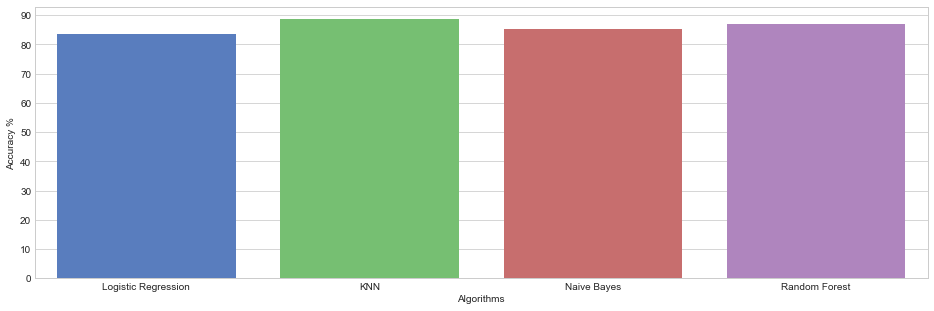

In [19]:
methods = ["Logistic Regression", "KNN", "Naive Bayes", "Random Forest"]
accuracy = [83.60, 88.52, 85.24, 86.89,]
# colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette="muted")
plt.show()